In [83]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
#import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
#import tensorflow_datasets as tfds

from tensorflow.keras import layers
import pathlib
from pathlib import Path
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [90]:
#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
#from keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
#from keras.utils import to_categorical
import glob

In [55]:
# data_dir = pathlib.Path('data_1/')
# # data = 'data_1/'

In [85]:
ls data_2/

test/  train/ val/


In [86]:
ls data_2/train

badminton/  baseball/   basketball/ boxing/     cricket/    football/


In [110]:
train = pathlib.Path('data_2/train/')
test = pathlib.Path('data_2/test/')
val = pathlib.Path('data_2/val/')

In [111]:
image_count = len(list(train.glob('*/*.jpg')))
print(image_count)

2962


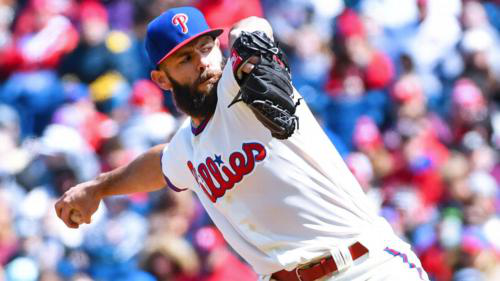

In [112]:
baseball = list(train.glob('baseball/*'))
PIL.Image.open(str(baseball[10]))

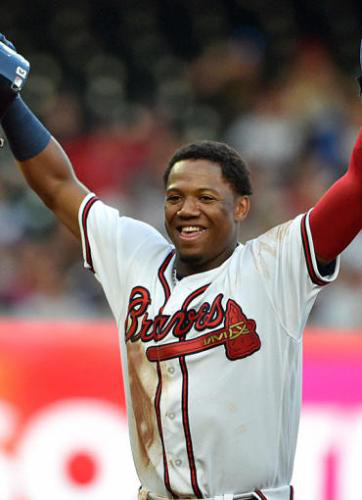

In [113]:
PIL.Image.open(str(baseball[1]))

In [114]:
batch_size = 32
img_height = 180
img_width = 180

## Data Augmentation

In [115]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_ds = train_datagen.flow_from_directory(
    train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

val_ds = train_datagen.flow_from_directory(
    train, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

init_images = train_datagen.flow_from_directory(
      train,
      target_size=(img_width, img_height),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size)

Found 2604 images belonging to 6 classes.
Found 647 images belonging to 6 classes.
Found 3251 images belonging to 6 classes.


In [120]:
from keras.preprocessing.image import ImageDataGenerator



Found 4063 files belonging to 6 classes.
Using 3251 files for training.
Found 4063 files belonging to 6 classes.
Using 812 files for validation.


In [121]:
class_names = train.class_names
print(class_names)

AttributeError: 'PosixPath' object has no attribute 'class_names'

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

AttributeError: 'PosixPath' object has no attribute 'take'

<Figure size 720x720 with 0 Axes>

In [66]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [67]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [68]:
normalization_layer = layers.Rescaling(1./255)

In [69]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0069246707 0.99801385


In [71]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)])

In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [74]:
epochs=11
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/11
102/102 [==============================] - 38s 364ms/step - loss: 1.4657 - accuracy: 0.4020 - val_loss: 1.1607 - val_accuracy: 0.5357
Epoch 2/11
102/102 [==============================] - 32s 317ms/step - loss: 0.9201 - accuracy: 0.6635 - val_loss: 0.9896 - val_accuracy: 0.6626
Epoch 3/11
102/102 [==============================] - 40s 389ms/step - loss: 0.6782 - accuracy: 0.7699 - val_loss: 1.0419 - val_accuracy: 0.6638
Epoch 4/11
102/102 [==============================] - 33s 329ms/step - loss: 0.4593 - accuracy: 0.8404 - val_loss: 0.9265 - val_accuracy: 0.6847
Epoch 5/11
102/102 [==============================] - 33s 321ms/step - loss: 0.2879 - accuracy: 0.9065 - val_loss: 1.0916 - val_accuracy: 0.6798
Epoch 6/11
102/102 [==============================] - 36s 353ms/step - loss: 0.1858 - accuracy: 0.9363 - val_loss: 1.1529 - val_accuracy: 0.6527
Epoch 7/11
102/102 [==============================] - 30s 292ms/step - loss: 0.1102 - accuracy: 0.9662 - val_loss: 1.4343 - val_ac

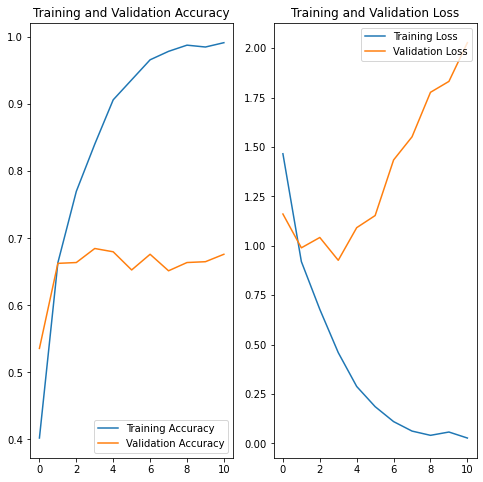

In [75]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [76]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

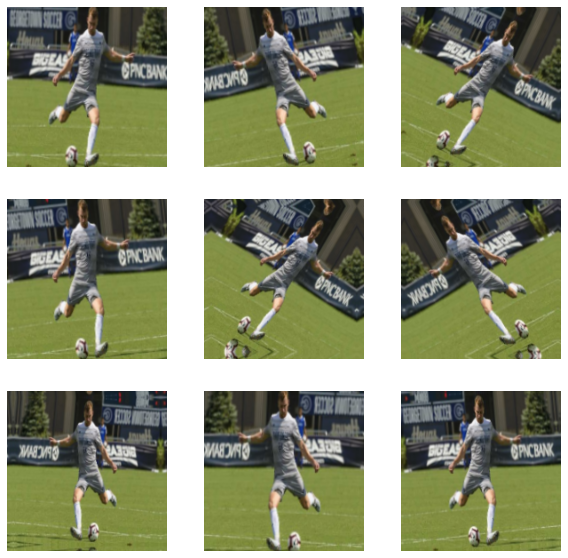

In [77]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [79]:
model_1 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)])

In [80]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/15
102/102 [==============================] - 27s 258ms/step - loss: 0.0440 - accuracy: 0.9889 - val_loss: 1.9335 - val_accuracy: 0.6736
Epoch 2/15
102/102 [==============================] - 26s 257ms/step - loss: 0.0326 - accuracy: 0.9902 - val_loss: 2.1852 - val_accuracy: 0.6626
Epoch 3/15
102/102 [==============================] - 29s 287ms/step - loss: 0.0605 - accuracy: 0.9785 - val_loss: 2.1498 - val_accuracy: 0.6650
Epoch 4/15
102/102 [==============================] - 26s 255ms/step - loss: 0.0358 - accuracy: 0.9862 - val_loss: 2.3029 - val_accuracy: 0.6687
Epoch 5/15
102/102 [==============================] - 27s 270ms/step - loss: 0.0726 - accuracy: 0.9757 - val_loss: 2.7168 - val_accuracy: 0.6515
Epoch 6/15
102/102 [==============================] - 27s 268ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 2.4019 - val_accuracy: 0.6515
Epoch 7/15
 24/102 [======>.......................] - ETA: 20s - loss: 0.0077 - accuracy: 0.9974